In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing raw data
df = pd.read_csv("titanic-passengers.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#finding missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:title={'center':'Histogram of different ages'}, xlabel='Age', ylabel='Frequency'>

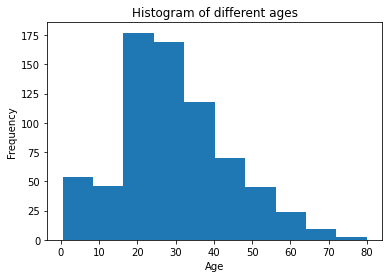

In [5]:
#replacing missing values
plt.title("Histogram of different ages")
plt.xlabel("Age")
df["Age"].plot.hist()

In [6]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [7]:
df["Cabin"].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [8]:
df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [9]:
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Cabin"].fillna('G6', inplace = True)
df["Embarked"].fillna('S', inplace = True)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

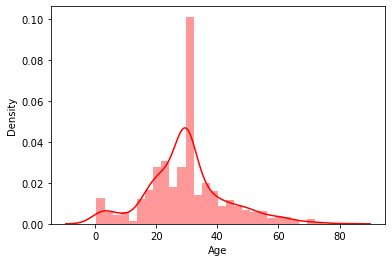

In [10]:
#visualisation phase
sns.distplot(df["Age"], hist= True, kde= True, color="red")

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survived', ylabel='Density'>

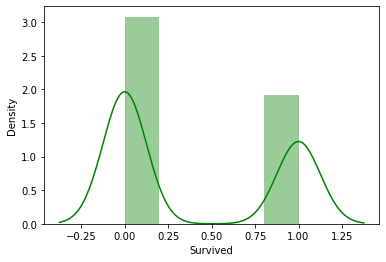

In [11]:
sns.distplot(df["Survived"], hist= True, kde= True, color="green")

(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

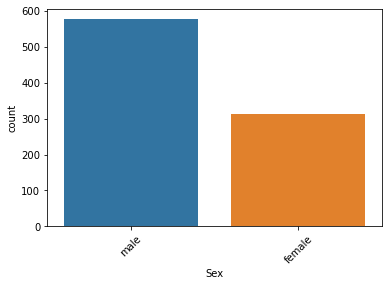

In [12]:
sns.countplot(x='Sex', data=df)
plt.xticks(rotation = 45)

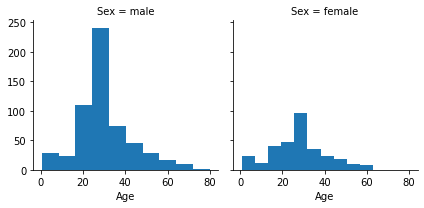

In [13]:
#visualisation of the correlation between two different features
g = sns.FacetGrid(df, col='Sex')
g.map(plt.hist,'Age')

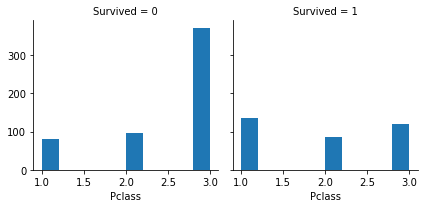

In [14]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist,'Pclass')

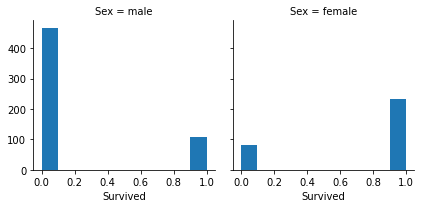

In [15]:
g = sns.FacetGrid(df, col='Sex')
g.map(plt.hist,'Survived')

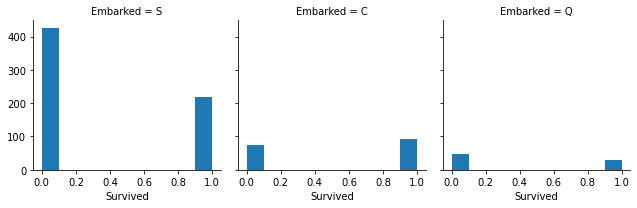

In [16]:
g = sns.FacetGrid(df, col='Embarked')
g.map(plt.hist,'Survived')

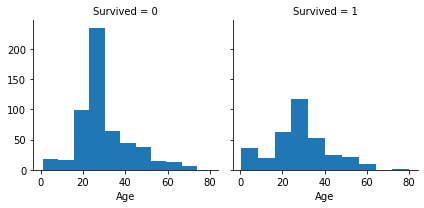

In [17]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist,'Age')

None


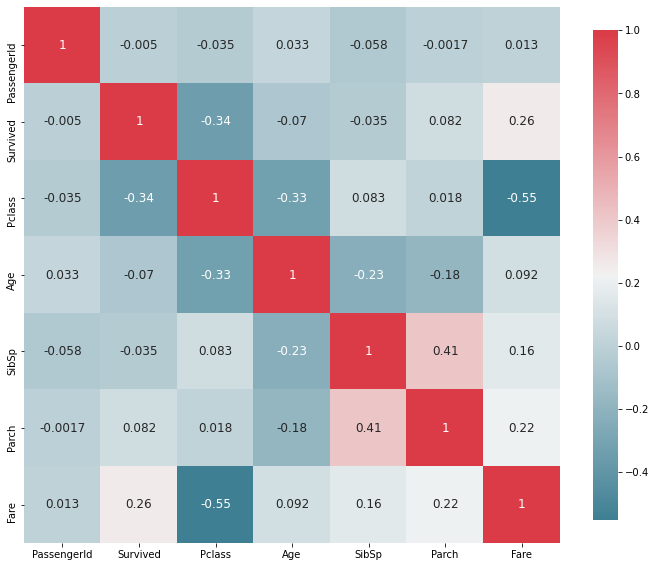

In [18]:
#correlation matrix
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
print(plot_correlation_map(df))

In [19]:
#relation between Pclass and Survived
df[["Pclass","Survived"]].groupby(["Pclass"], as_index = True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [20]:
#creating new columns 
list = []
list_name = df["Name"].values.tolist()
for i in list_name:
    name = i.split(sep = ",")
    list.append(name[1])
list_title = []
for j in list:
    title=j.split(sep = ".")
    list_title.append(title[0])
list_title

[' Mr',
 ' Mrs',
 ' Miss',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Master',
 ' Mrs',
 ' Mrs',
 ' Miss',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mrs',
 ' Master',
 ' Mr',
 ' Mrs',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Don',
 ' Mrs',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Miss',
 ' Mrs',
 ' Mrs',
 ' Mr',
 ' Miss',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mrs',
 ' Master',
 ' Mr',
 ' Mrs',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Master',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Master',
 ' Mr',
 ' Master',
 ' Mrs',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Master',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mrs',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Mr'

In [21]:
df["Title"] = list_title

In [22]:
df = df.drop(["Name"], axis = 1)

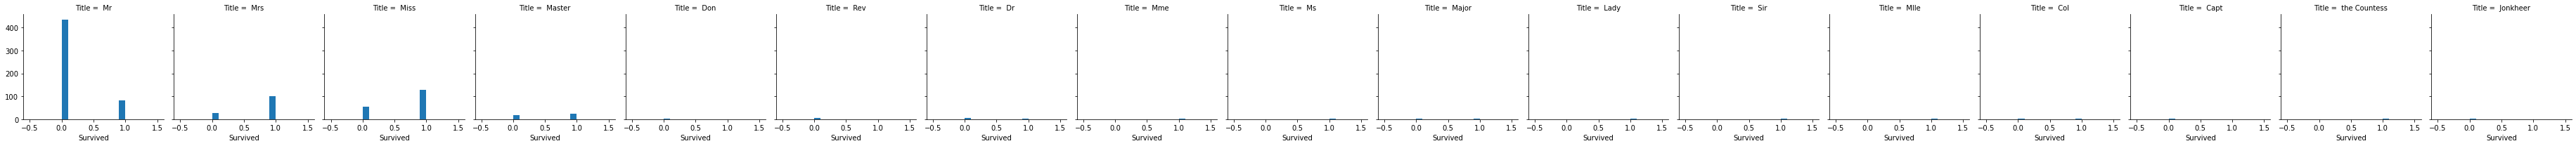

In [24]:
g = sns.FacetGrid(df, col='Title')
g.map(plt.hist,'Survived')

In [25]:
#grouping these titles in more useful ones
for i in range(len(list_title)):
    if list_title[i]==" Capt" or list_title[i]==" Col" or list_title[i]==" Major" or list_title[i]==" Dr" or list_title[i]==" Rev":
        list_title[i]=" Officer"

In [26]:
for j in range(len(list_title)):
    if list_title[j]==" Jonkheer" or list_title[j]==" Don" or list_title[j]==" Sir" or list_title[j]==" Lady" or list_title[j]==" the Countess" or list_title[j]==" Dona":
        list_title[j]=" Royality"

In [27]:
for k in range(len(list_title)):
    if list_title[k]==" Mme" or list_title[k]==" Mlle":
        list_title[k]=" Miss"

In [28]:
for l in range(len(list_title)):
    if list_title[l]==" Mr" or list_title[l]==" Ms":
        list_title[l]=" Mrs"

In [29]:
df["New Title"] = list_title
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,New Title
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,G6,S,Mr,Mrs
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,G6,S,Miss,Miss
3,4,1,1,female,35.000000,1,0,113803,53.1000,C123,S,Mrs,Mrs
4,5,0,3,male,35.000000,0,0,373450,8.0500,G6,S,Mr,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,G6,S,Rev,Officer
887,888,1,1,female,19.000000,0,0,112053,30.0000,B42,S,Miss,Miss
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,G6,S,Miss,Miss
889,890,1,1,male,26.000000,0,0,111369,30.0000,C148,C,Mr,Mrs


In [30]:
df["New Title"].describe()

count      891
unique       5
top        Mrs
freq       643
Name: New Title, dtype: object

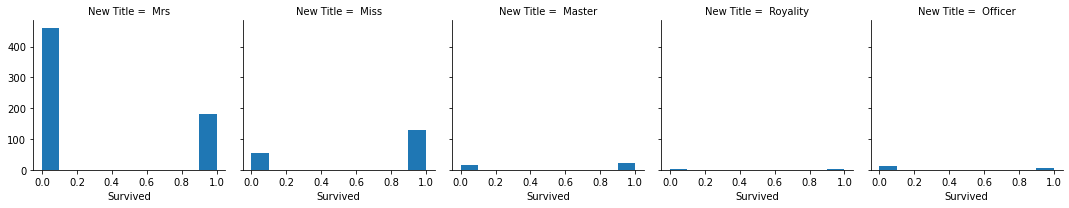

In [31]:
g = sns.FacetGrid(df, col='New Title')
g.map(plt.hist,'Survived')

In [32]:
df[["New Title","Survived"]].groupby(["New Title"], as_index = True).mean()

,Survived
New Title,
Master,0.575000
Miss,0.702703
Mrs,0.281493
Officer,0.277778
Royality,0.600000


In [33]:
df["Family Size"]= df["SibSp"]+df["Parch"]
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,New Title,Family Size
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,G6,S,Mr,Mrs,1
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,1
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,G6,S,Miss,Miss,0
3,4,1,1,female,35.000000,1,0,113803,53.1000,C123,S,Mrs,Mrs,1
4,5,0,3,male,35.000000,0,0,373450,8.0500,G6,S,Mr,Mrs,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,G6,S,Rev,Officer,0
887,888,1,1,female,19.000000,0,0,112053,30.0000,B42,S,Miss,Miss,0
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,G6,S,Miss,Miss,3
889,890,1,1,male,26.000000,0,0,111369,30.0000,C148,C,Mr,Mrs,0


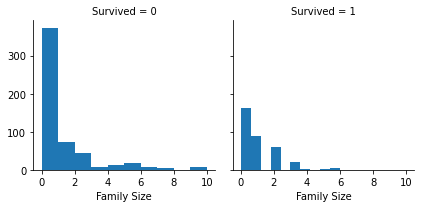

In [34]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist,'Family Size')